In [1]:
# Import Dependencies
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read Crime Data
project_data = pd.read_csv("project_data.csv")

# Read CTA Data
cta_data = pd.read_csv("CTA_-_Ridership_-_Daily_Boarding_Totals.csv")

# Rename CTA Columns
cta_data.columns = ["Date", "Day Type", "Bus", "Rail Boardings", "Total Rides"]

In [3]:
# Assign Date Column to a Variable
all_dates = project_data["Date"]

# Convert All Dates to a Datetime 
[dt.datetime.strptime(x, "%Y-%m-%d") for x in all_dates]

# Replace Date Column with Datetime Values
project_data["Date"] = pd.to_datetime(all_dates)

# Display Modified DataFrame
project_data

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
1,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
2,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
3,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
4,2001-01-01,U,297192.0,126455.0,423647.0,013XX W 61 ST,ASSAULT,SIMPLE,CTA PLATFORM,True,False,2001,41.783289,-87.659218,"(41.783289439, -87.659218039)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69363,2019-12-31,W,511289.0,431677.0,942966.0,0000X E ROOSEVELT RD,BATTERY,SIMPLE,CTA STATION,False,False,2019,41.867428,-87.626269,"(41.867428235, -87.626269143)"
69364,2019-12-31,W,511289.0,431677.0,942966.0,011XX W GRANVILLE AVE,THEFT,OVER $500,CTA TRAIN,False,False,2019,41.994568,-87.659057,"(41.994567578, -87.65905678)"
69365,2019-12-31,W,511289.0,431677.0,942966.0,0000X N DEARBORN ST,THEFT,POCKET-PICKING,CTA TRAIN,False,False,2019,41.882382,-87.629413,"(41.882381731, -87.629412971)"
69366,2019-12-31,W,511289.0,431677.0,942966.0,0000X N DEARBORN ST,DECEPTIVE PRACTICE,CREDIT CARD FRAUD,CTA TRAIN,False,False,2019,41.882382,-87.629413,"(41.882381731, -87.629412971)"


In [4]:
# Sort CTA Data by L Ridership Total
highest_boarding = cta_data.sort_values("Rail Boardings", ascending=False)

# Isolate Only Date Column
highest_boarding = highest_boarding["Date"]

# Display Most Popular Days to Ride L
highest_boarding

5850    11/04/2016
5753    10/28/2016
5338    06/18/2015
2740    07/03/2008
4592    06/28/2013
           ...    
1088    12/25/2003
6665    01/30/2019
723     12/25/2002
358     12/25/2001
1454    12/25/2004
Name: Date, Length: 7061, dtype: object

In [5]:
# Sort CTA Data by L Ridership Total
lowest_boarding = cta_data.sort_values("Rail Boardings", ascending=True)

# Isolate Only Date Column
lowest_boarding = lowest_boarding["Date"]

# Display Least Popular Days to Ride L
lowest_boarding

1454    12/25/2004
358     12/25/2001
723     12/25/2002
6665    01/30/2019
1088    12/25/2003
           ...    
4592    06/28/2013
2740    07/03/2008
5338    06/18/2015
5753    10/28/2016
5850    11/04/2016
Name: Date, Length: 7061, dtype: object

In [6]:
# Assign All Location Description Column Values to a Variable
cta_platform = project_data[project_data["Location Description"] == "CTA PLATFORM"]
cta_train = project_data[project_data["Location Description"] == "CTA TRAIN"]
cta_station = project_data[project_data["Location Description"] == "CTA STATION"]

In [7]:
# Create a List to Hold Location Description Values
p_type = [cta_platform, cta_train, cta_station]

# Create a List to Hold Location Description Value Names
location_description  = ["CTA PLATFORM", "CTA TRAIN", "CTA STATION"]

# Create a For Loop to Display Primary Crime Type
for x in range(3):
    print(f"LOCATION DESCRIPTION: {location_description[x]}")
    print("PRIMARY CRIME TYPE:")
    print(p_type[x]["Primary Type"].value_counts())

LOCATION DESCRIPTION: CTA PLATFORM
PRIMARY CRIME TYPE:
DECEPTIVE PRACTICE                  12669
THEFT                                6056
NARCOTICS                            4550
BATTERY                              4001
CRIMINAL TRESPASS                    2689
CRIMINAL DAMAGE                      2506
ROBBERY                              2357
ASSAULT                              1458
PUBLIC PEACE VIOLATION                314
SEX OFFENSE                           245
WEAPONS VIOLATION                     221
OTHER OFFENSE                         188
LIQUOR LAW VIOLATION                  129
INTERFERENCE WITH PUBLIC OFFICER      106
CRIM SEXUAL ASSAULT                    26
GAMBLING                               23
BURGLARY                               22
PROSTITUTION                           19
OFFENSE INVOLVING CHILDREN             16
STALKING                               14
KIDNAPPING                              9
HOMICIDE                                5
ARSON                

In [8]:
# Assign All Years to a Variable
year_2001 = project_data[project_data["Year"] == 2001]
year_2002 = project_data[project_data["Year"] == 2002]
year_2003 = project_data[project_data["Year"] == 2003]
year_2004 = project_data[project_data["Year"] == 2004]
year_2005 = project_data[project_data["Year"] == 2005]
year_2006 = project_data[project_data["Year"] == 2006]
year_2007 = project_data[project_data["Year"] == 2007]
year_2008 = project_data[project_data["Year"] == 2008]
year_2009 = project_data[project_data["Year"] == 2009]
year_2010 = project_data[project_data["Year"] == 2010]
year_2011 = project_data[project_data["Year"] == 2011]
year_2012 = project_data[project_data["Year"] == 2012]
year_2013 = project_data[project_data["Year"] == 2013]
year_2014 = project_data[project_data["Year"] == 2014]
year_2015 = project_data[project_data["Year"] == 2015]
year_2016 = project_data[project_data["Year"] == 2016]
year_2017 = project_data[project_data["Year"] == 2017]
year_2018 = project_data[project_data["Year"] == 2018]
year_2019 = project_data[project_data["Year"] == 2019]

In [9]:
# Example DO NOT EDIT!
# Filter for a Single Month Example
january_2001 = year_2001[year_2001["Date"].dt.month == 1]

# Display Example
january_2001

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
1,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
2,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
3,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
4,2001-01-01,U,297192.0,126455.0,423647.0,013XX W 61 ST,ASSAULT,SIMPLE,CTA PLATFORM,True,False,2001,41.783289,-87.659218,"(41.783289439, -87.659218039)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2001-01-31,W,999392.0,610508.0,1609900.0,051XX S PULASKI RD,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA PLATFORM,True,False,2001,41.800136,-87.723509,"(41.800136399, -87.723509219)"
421,2001-01-31,W,999392.0,610508.0,1609900.0,012XX N CLARK ST,ROBBERY,ARMED: OTHER DANGEROUS WEAPON,CTA PLATFORM,True,False,2001,41.903992,-87.631596,"(41.903992238, -87.63159645)"
422,2001-01-31,W,999392.0,610508.0,1609900.0,0000X S DEARBORN ST,THEFT,$500 AND UNDER,CTA TRAIN,True,False,2001,41.881041,-87.629229,"(41.881041415, -87.629229386)"
423,2001-01-31,W,999392.0,610508.0,1609900.0,005XX N STATE ST,DECEPTIVE PRACTICE,THEFT OF LABOR/SERVICES,CTA TRAIN,True,False,2001,41.891632,-87.627923,"(41.891631653, -87.627923121)"


In [10]:
# Example DO NOT EDIT!
# Filter for a Single Day Example
january_01_2001 = january_2001[january_2001["Date"].dt.day == 1]

# Display Example
january_01_2001

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
0,2001-01-01,U,297192.0,126455.0,423647.0,046XX N BROADWAY,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.965917,-87.657969,"(41.965917251, -87.657969065)"
1,2001-01-01,U,297192.0,126455.0,423647.0,015XX W JARVIS AV,CRIMINAL DAMAGE,TO PROPERTY,CTA PLATFORM,True,False,2001,42.015918,-87.669069,"(42.015918091, -87.669068759)"
2,2001-01-01,U,297192.0,126455.0,423647.0,003XX N STATE ST,ROBBERY,STRONGARM - NO WEAPON,CTA PLATFORM,False,False,2001,41.888112,-87.628175,"(41.888112342, -87.628174848)"
3,2001-01-01,U,297192.0,126455.0,423647.0,033XX W BELMONT AV,CRIMINAL DAMAGE,TO VEHICLE,CTA PLATFORM,False,False,2001,41.939177,-87.712270,"(41.939176878, -87.712269825)"
4,2001-01-01,U,297192.0,126455.0,423647.0,013XX W 61 ST,ASSAULT,SIMPLE,CTA PLATFORM,True,False,2001,41.783289,-87.659218,"(41.783289439, -87.659218039)"
5,2001-01-01,U,297192.0,126455.0,423647.0,001XX W 35 ST,THEFT,$500 AND UNDER,CTA TRAIN,False,False,2001,41.830842,-87.630737,"(41.830841773, -87.630737477)"
6,2001-01-01,U,297192.0,126455.0,423647.0,022XX N CALIFORNIA AV,THEFT,OVER $500,CTA TRAIN,False,False,2001,41.922028,-87.697187,"(41.922027977, -87.697186994)"
7,2001-01-01,U,297192.0,126455.0,423647.0,035XX S STATE ST,THEFT,$500 AND UNDER,CTA TRAIN,False,False,2001,41.830941,-87.626796,"(41.830941085, -87.626795589)"
8,2001-01-01,U,297192.0,126455.0,423647.0,002XX W 63 ST,THEFT,OVER $500,CTA TRAIN,False,False,2001,41.780091,-87.630558,"(41.780090741, -87.630558478)"
9,2001-01-01,U,297192.0,126455.0,423647.0,011XX S STATE ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,CTA TRAIN,True,False,2001,41.868041,-87.627290,"(41.868040997, -87.627290382)"


In [11]:
# Example DO NOT EDIT!
# Filter Homicide Data
homicide = project_data[project_data["Primary Type"] == "HOMICIDE"]

# Display Homicide Data
homicide

,Date,Day Type,Bus,Rail Boardings,Total Rides,Block,Primary Type,Description,Location Description,Arrest,Domestic,Year,Latitude,Longitude,Location
9260,2003-05-22,W,967683.0,590893.0,1558576.0,011XX W ARGYLE ST,HOMICIDE,FIRST DEGREE MURDER,CTA TRAIN,True,False,2003,41.973263,-87.658436,"(41.973263481, -87.658435722)"
28053,2008-07-27,U,520244.0,291389.0,811633.0,011XX S STATE ST,HOMICIDE,FIRST DEGREE MURDER,CTA PLATFORM,True,False,2008,41.868165,-87.627440,"(41.868165405, -87.62743954)"
37479,2011-03-29,W,1018975.0,688681.0,1707656.0,009XX W FULLERTON AVE,HOMICIDE,FIRST DEGREE MURDER,CTA PLATFORM,True,False,2011,41.925398,-87.652311,"(41.925398449, -87.652311296)"
46154,2013-03-16,A,626782.0,610526.0,1237308.0,003XX E 43RD ST,HOMICIDE,FIRST DEGREE MURDER,CTA PLATFORM,True,False,2013,41.816599,-87.619114,"(41.816598679, -87.619113763)"
55603,2016-06-23,W,757817.0,760840.0,1518657.0,002XX W 47TH ST,HOMICIDE,FIRST DEGREE MURDER,CTA TRAIN,True,False,2016,41.809125,-87.631907,"(41.809125265, -87.631906508)"
59162,2017-07-09,U,400539.0,402561.0,803100.0,000XX W 95TH ST,HOMICIDE,FIRST DEGREE MURDER,CTA PLATFORM,True,False,2017,41.721627,-87.624485,"(41.721627204, -87.624485177)"
67314,2019-07-13,A,496000.0,471671.0,967671.0,001XX W CERMAK RD,HOMICIDE,FIRST DEGREE MURDER,CTA PLATFORM,True,False,2019,41.852868,-87.630915,"(41.852868298, -87.63091491)"
69043,2019-12-03,W,849440.0,732651.0,1582091.0,075XX N PAULINA ST,HOMICIDE,FIRST DEGREE MURDER,CTA STATION,True,False,2019,42.018498,-87.672983,"(42.018498254, -87.672983233)"


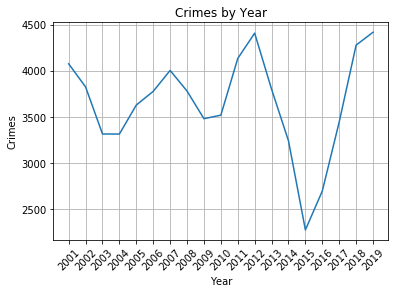

In [12]:
# Created list of project data by year
plot_year = [year_2001, year_2002, year_2003, year_2004, year_2005, year_2006, year_2007, year_2008, year_2009, year_2010, year_2011, year_2012, year_2013, year_2014, year_2015, year_2016, year_2017, year_2018, year_2019]

# Created empty list to append total crime count for that year
total_crime_year = []

# Created year list to plot 
year = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# For loop to add total crime count to list above
for x in range(19):
    total_crime_year.append(plot_year[x]["Primary Type"].count())

# Plotted year vs crime count 
plt.plot(year, total_crime_year)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Crimes")
plt.xlabel("Year")
plt.title("Crimes by Year")
plt.grid()
plt.show()

In [13]:
# set ridership count for year to 0 
ridership_2001 = 0
ridership_2002 = 0
ridership_2003 = 0
ridership_2004 = 0
ridership_2005 = 0
ridership_2006 = 0
ridership_2007 = 0
ridership_2008 = 0
ridership_2009 = 0
ridership_2010 = 0
ridership_2011 = 0
ridership_2012 = 0
ridership_2013 = 0
ridership_2014 = 0
ridership_2015 = 0
ridership_2016 = 0
ridership_2017 = 0
ridership_2018 = 0
ridership_2019 = 0

#For loop to get total rider count for each year 
for x in range(cta_data["Rail Boardings"].count()):    
    if cta_data["Date"][x][6:10] == "2001":
        ridership_2001 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2002":
        ridership_2002 += cta_data["Rail Boardings"][x]    
    elif cta_data["Date"][x][6:10] == "2003":
        ridership_2003 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2004":
        ridership_2004 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2005":
        ridership_2005 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2006":
        ridership_2006 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2007":
        ridership_2007 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2008":
        ridership_2008 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2009":
        ridership_2009 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2010":
        ridership_2010 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2011":
        ridership_2011 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2012":
        ridership_2012 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2013":
        ridership_2013 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2014":
        ridership_2014 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2015":
        ridership_2015 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2016":
        ridership_2016 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2017":
        ridership_2017 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2018":
        ridership_2018 += cta_data["Rail Boardings"][x]
    elif cta_data["Date"][x][6:10] == "2019":
        ridership_2019 += cta_data["Rail Boardings"][x]

# Print rider count for each year
print(f'Total ridership in 2001: {ridership_2001}')
print(f'Total ridership in 2002: {ridership_2002}')
print(f'Total ridership in 2003: {ridership_2003}')
print(f'Total ridership in 2004: {ridership_2004}')
print(f'Total ridership in 2005: {ridership_2005}')
print(f'Total ridership in 2006: {ridership_2006}')
print(f'Total ridership in 2007: {ridership_2007}')
print(f'Total ridership in 2008: {ridership_2008}')
print(f'Total ridership in 2009: {ridership_2009}')
print(f'Total ridership in 2010: {ridership_2010}')
print(f'Total ridership in 2011: {ridership_2011}')
print(f'Total ridership in 2012: {ridership_2012}')
print(f'Total ridership in 2013: {ridership_2013}')
print(f'Total ridership in 2014: {ridership_2014}')
print(f'Total ridership in 2015: {ridership_2015}')
print(f'Total ridership in 2016: {ridership_2016}')
print(f'Total ridership in 2017: {ridership_2017}')
print(f'Total ridership in 2018: {ridership_2018}')
print(f'Total ridership in 2019: {ridership_2019}')

Total ridership in 2001: 181692888
Total ridership in 2002: 180399629
Total ridership in 2003: 181135096
Total ridership in 2004: 178716468
Total ridership in 2005: 186759525
Total ridership in 2006: 195169313
Total ridership in 2007: 190273414
Total ridership in 2008: 198137253
Total ridership in 2009: 202569040
Total ridership in 2010: 210849074
Total ridership in 2011: 241866109
Total ridership in 2012: 231154339
Total ridership in 2013: 228684399
Total ridership in 2014: 258884389
Total ridership in 2015: 241676065
Total ridership in 2016: 238645812
Total ridership in 2017: 230204047
Total ridership in 2018: 225894953
Total ridership in 2019: 218467141


In [14]:
# Added ridership count for each year to list
ridership_count = [ridership_2001, ridership_2002, ridership_2003, ridership_2004, ridership_2005, ridership_2006, ridership_2007, ridership_2008, ridership_2009, ridership_2010, ridership_2011, ridership_2012, ridership_2013, ridership_2014, ridership_2015, ridership_2016, ridership_2017, ridership_2018, ridership_2019]

# Found total riders to ensure that rider aligns with rider count in cta_data (excluded 2020 year)
# Set ridership count to 0
total_ridership = 0
for x in range(19):
    total_ridership += ridership_count[x]

print(total_ridership)
cta_data["Rail Boardings"].sum()

4021178954


4054658876

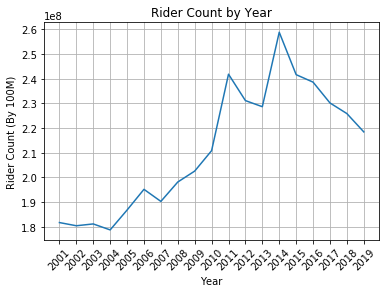

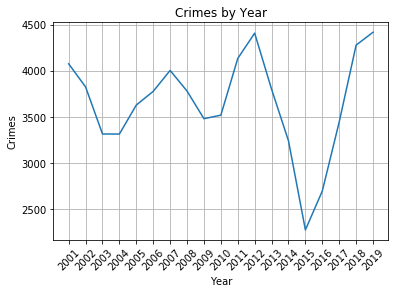

In [15]:
#Plot rider count vs year
plt.plot(year, ridership_count)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Rider Count (By 100M)")
plt.xlabel("Year")
plt.title("Rider Count by Year")
plt.grid()
plt.show()

#Plot crimes vs year
plt.plot(year, total_crime_year)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Crimes")
plt.xlabel("Year")
plt.title("Crimes by Year")
plt.grid()
plt.show()


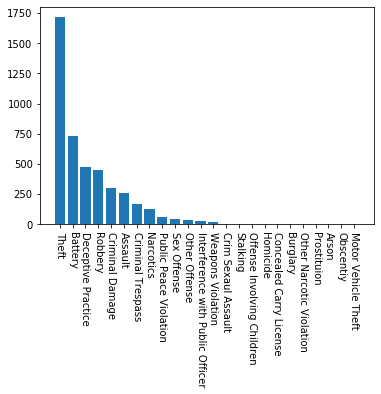

THEFT                                1715
BATTERY                               730
DECEPTIVE PRACTICE                    471
ROBBERY                               449
CRIMINAL DAMAGE                       303
ASSAULT                               257
CRIMINAL TRESPASS                     170
NARCOTICS                             125
PUBLIC PEACE VIOLATION                 57
SEX OFFENSE                            44
OTHER OFFENSE                          33
INTERFERENCE WITH PUBLIC OFFICER       26
WEAPONS VIOLATION                      18
CRIM SEXUAL ASSAULT                     5
STALKING                                3
OFFENSE INVOLVING CHILDREN              2
HOMICIDE                                2
MOTOR VEHICLE THEFT                     1
CONCEALED CARRY LICENSE VIOLATION       1
OTHER NARCOTIC VIOLATION                1
ARSON                                   1
OBSCENITY                               1
BURGLARY                                1
PROSTITUTION                      

In [16]:
type_of_crime = year_2019["Primary Type"].value_counts()
len(year_2019["Primary Type"].value_counts())
x_axis = np.arange(len(type_of_crime))
plt.bar(x_axis, type_of_crime)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Theft", "Battery", "Deceptive Practice", "Robbery", "Criminal Damage", "Assault", "Criminal Trespass", "Narcotics", "Public Peace Violation", "Sex Offense", "Other Offense", "Interference with Public Officer", "Weapons Violation", "Crim Sexaul Assault", "Stalking", "Offense Involving Children", "Homicide", "Concealed Carry License", "Burglary", "Other Narcotic Violation", "Prostituion", "Arson", "Obscentiy", "Motor Vehicle Theft"], rotation = 270)
plt.show()
type_of_crime

In [17]:
ridership_count[0]

181692888

In [18]:
total_crime_year[0] / ridership_count[0]

2.2422451670205164e-05

Crime Rate in 2001: 2.2422451670205164e-05
Crime Rate in 2002: 2.1191839590756586e-05
Crime Rate in 2003: 1.8284695087472172e-05
Crime Rate in 2004: 1.8526552348829992e-05
Crime Rate in 2005: 1.941534173424354e-05
Crime Rate in 2006: 1.9342180089551272e-05
Crime Rate in 2007: 2.103289112161513e-05
Crime Rate in 2008: 1.906759048486455e-05
Crime Rate in 2009: 1.7169454917691273e-05
Crime Rate in 2010: 1.66754348657941e-05
Crime Rate in 2011: 1.708383211308038e-05
Crime Rate in 2012: 1.9065183976494596e-05
Crime Rate in 2013: 1.660804154812502e-05
Crime Rate in 2014: 1.2503650809164859e-05
Crime Rate in 2015: 9.392738167927387e-06
Crime Rate in 2016: 1.1280315281627486e-05
Crime Rate in 2017: 1.4956296576315185e-05
Crime Rate in 2018: 1.8933579273017225e-05
Crime Rate in 2019: 2.0218143468998846e-05


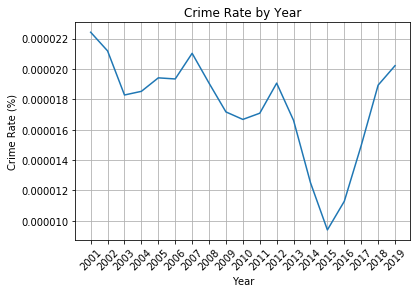

In [19]:
crime_year = []
for x in range(19):
    crime_year.append(total_crime_year[x] / ridership_count[x])
    print(f"Crime Rate in {year[x]}: {crime_year[x]}")
    
plt.plot(year, crime_year)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Crime Rate (%)")
plt.xlabel("Year")
plt.title("Crime Rate by Year")
plt.grid()
plt.show()

Riders Per Crime in 2001: 44598.15611192931
Riders Per Crime in 2002: 47187.975150405444
Riders Per Crime in 2003: 54690.54830917875
Riders Per Crime in 2004: 53976.583509513745
Riders Per Crime in 2005: 51505.66050744622
Riders Per Crime in 2006: 51700.48026490066
Riders Per Crime in 2007: 47544.5812093953
Riders Per Crime in 2008: 52445.01138168343
Riders Per Crime in 2009: 58242.96722254169
Riders Per Crime in 2010: 59968.45108077361
Riders Per Crime in 2011: 58534.87633107454
Riders Per Crime in 2012: 52451.63126843658
Riders Per Crime in 2013: 60211.79541864139
Riders Per Crime in 2014: 79976.64164349706
Riders Per Crime in 2015: 106465.2268722467
Riders Per Crime in 2016: 88650.0044576523
Riders Per Crime in 2017: 66861.47168167296
Riders Per Crime in 2018: 52816.21533785364
Riders Per Crime in 2019: 49460.525469775865


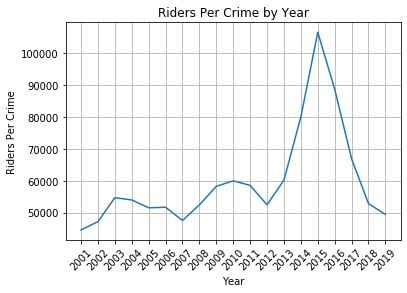

In [20]:
riders_per_crime = []
for x in range(19):
    riders_per_crime.append(ridership_count[x] / total_crime_year[x])
    print(f"Riders Per Crime in {year[x]}: {riders_per_crime[x]}")
    

plt.plot(year, riders_per_crime)
plt.xticks(ticks = year, rotation = 45)
plt.ylabel("Riders Per Crime")
plt.xlabel("Year")
plt.title("Riders Per Crime by Year")
plt.grid()
plt.show()